In [60]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Mobile Phone Price Prediction

In [62]:
df = pd.read_csv("data/mobile_price_prediction_data.csv")

In [63]:
df.head()

,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
0,4.3,4.0,128.0,6.00,48,13.0,4000,24999
1,3.4,6.0,64.0,4.50,48,12.0,4000,15999
2,4.3,4.0,4.0,4.50,64,16.0,4000,15000
3,4.4,6.0,64.0,6.40,48,15.0,3800,18999
4,4.5,6.0,128.0,6.18,35,15.0,3800,18999


## Exploratory Data Analysis

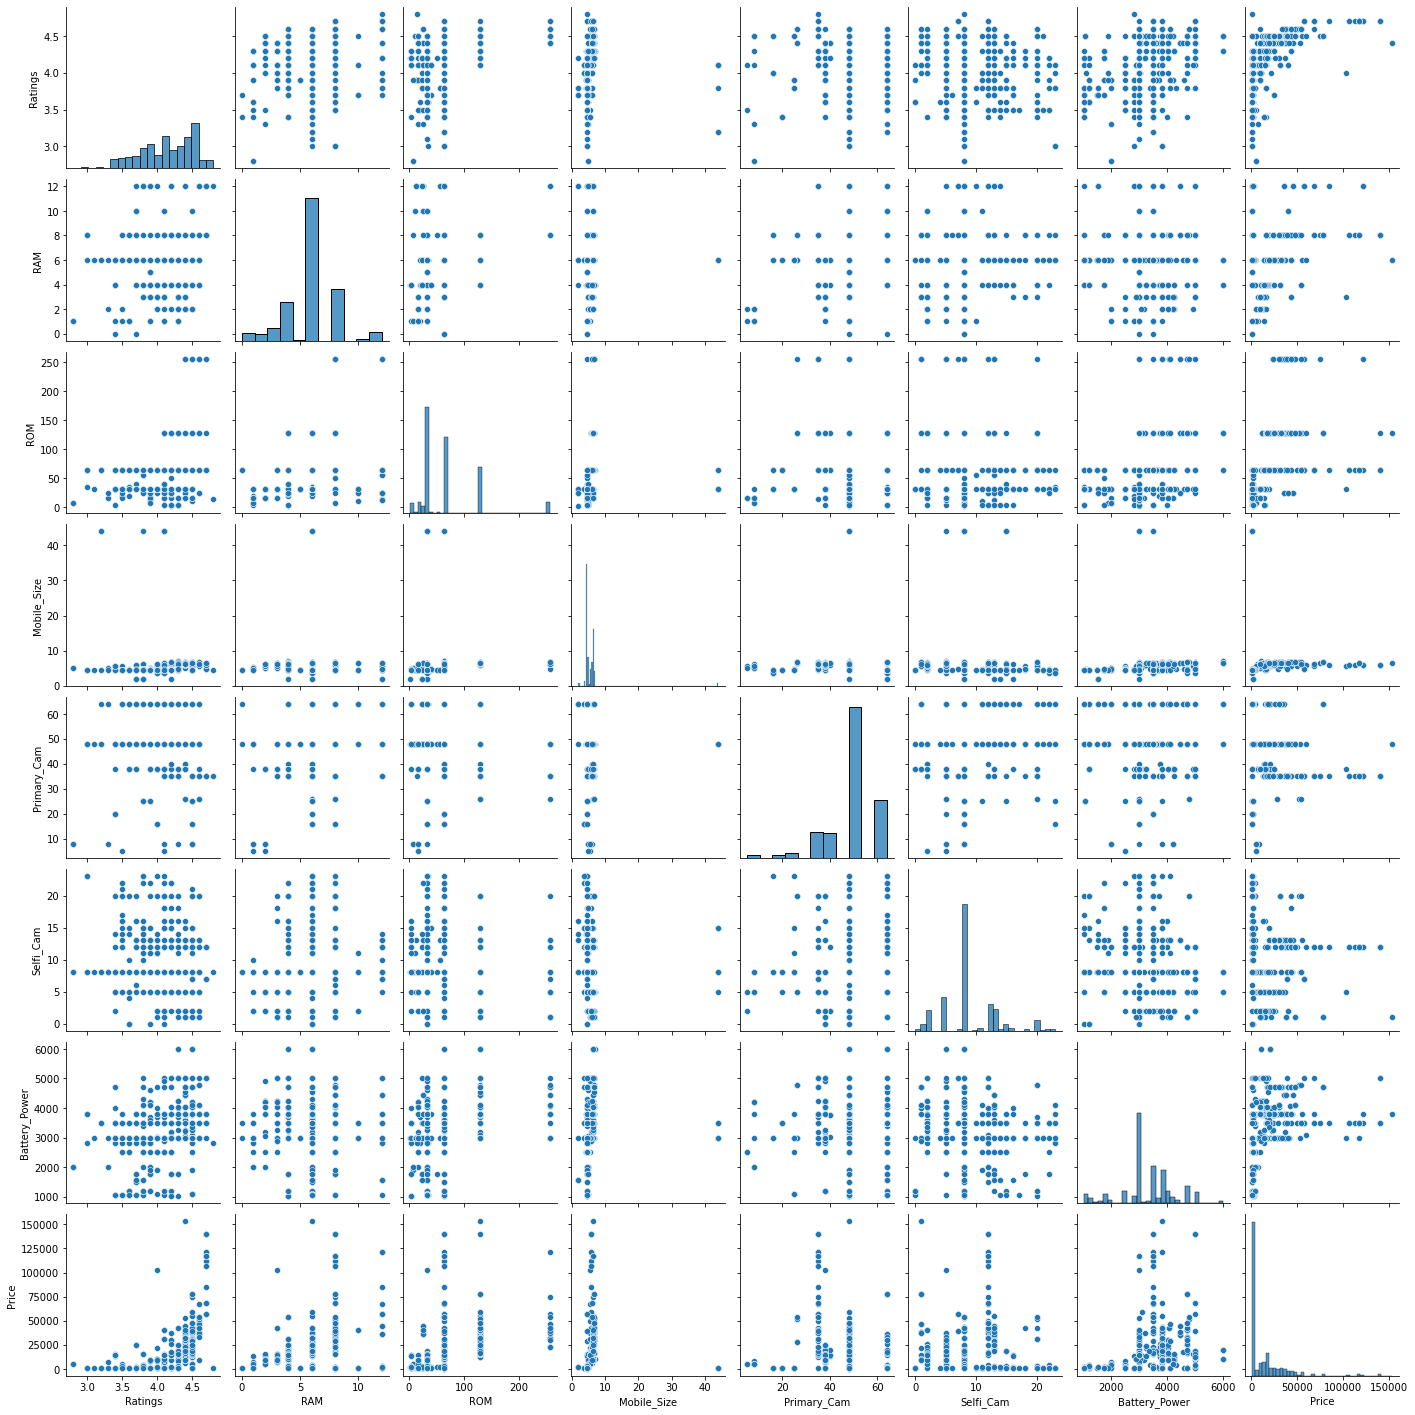

In [64]:
sns.pairplot(data = df)
plt.show()

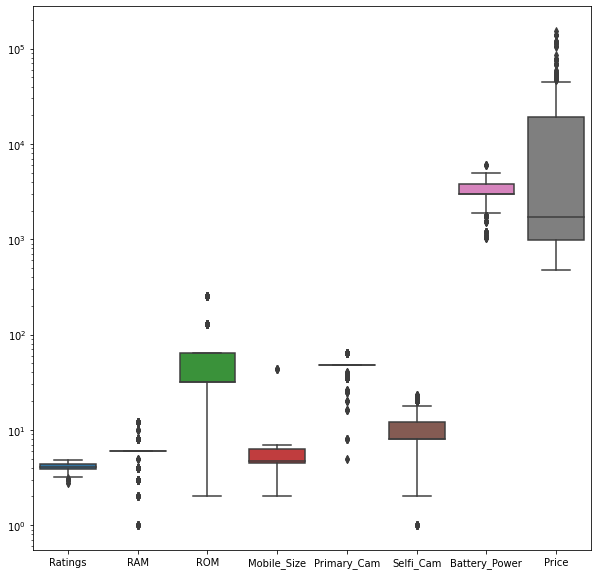

In [65]:
plt.figure(figsize = (10,10))
sns.boxplot(data = df)
plt.yscale("log")

### Checking For Null values

In [66]:
df.isnull().values.any()

False

In [67]:
df.isnull().sum(axis=0)

Ratings          0
RAM              0
ROM              0
Mobile_Size      0
Primary_Cam      0
Selfi_Cam        0
Battery_Power    0
Price            0
dtype: int64

### Removing Outliers
- Start using IQR
- Refine manually as IQR can be quite sensitive and remove a lot of data

In [68]:
def remove_outliers_iqr(df, target_columns):
    df_cleaned = df.copy()
    
    for column in target_columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        df_cleaned = df_cleaned[~((df_cleaned[column] < (Q1 - 1.5 * IQR)) | (df_cleaned[column] > (Q3 + 1.5 * IQR)))]
    
    return df_cleaned

In [69]:
cleaned_df = remove_outliers_iqr(df, target_columns=['Mobile_Size', 'ROM'])

In [70]:
cleaned_df.head()

,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
1,3.4,6.0,64.0,4.50,48,12.0,4000,15999
2,4.3,4.0,4.0,4.50,64,16.0,4000,15000
3,4.4,6.0,64.0,6.40,48,15.0,3800,18999
10,3.9,6.0,32.0,4.54,64,8.0,4100,1099
11,3.8,6.0,32.0,4.50,64,8.0,1050,1299


In [71]:
# Removing Primary_Cam outliers
cleaned_df = cleaned_df[cleaned_df['Primary_Cam'] > 8]

In [72]:
# Removing Selfi_Cam outliers
cleaned_df = cleaned_df[cleaned_df['Selfi_Cam'] > 2]

In [73]:
# Removing Mobile_Size outliers
cleaned_df = cleaned_df[cleaned_df['Mobile_Size'] > 2]

In [74]:
# Removing Battery_Power outliers
cleaned_df = cleaned_df[cleaned_df['Battery_Power'] < 6000]

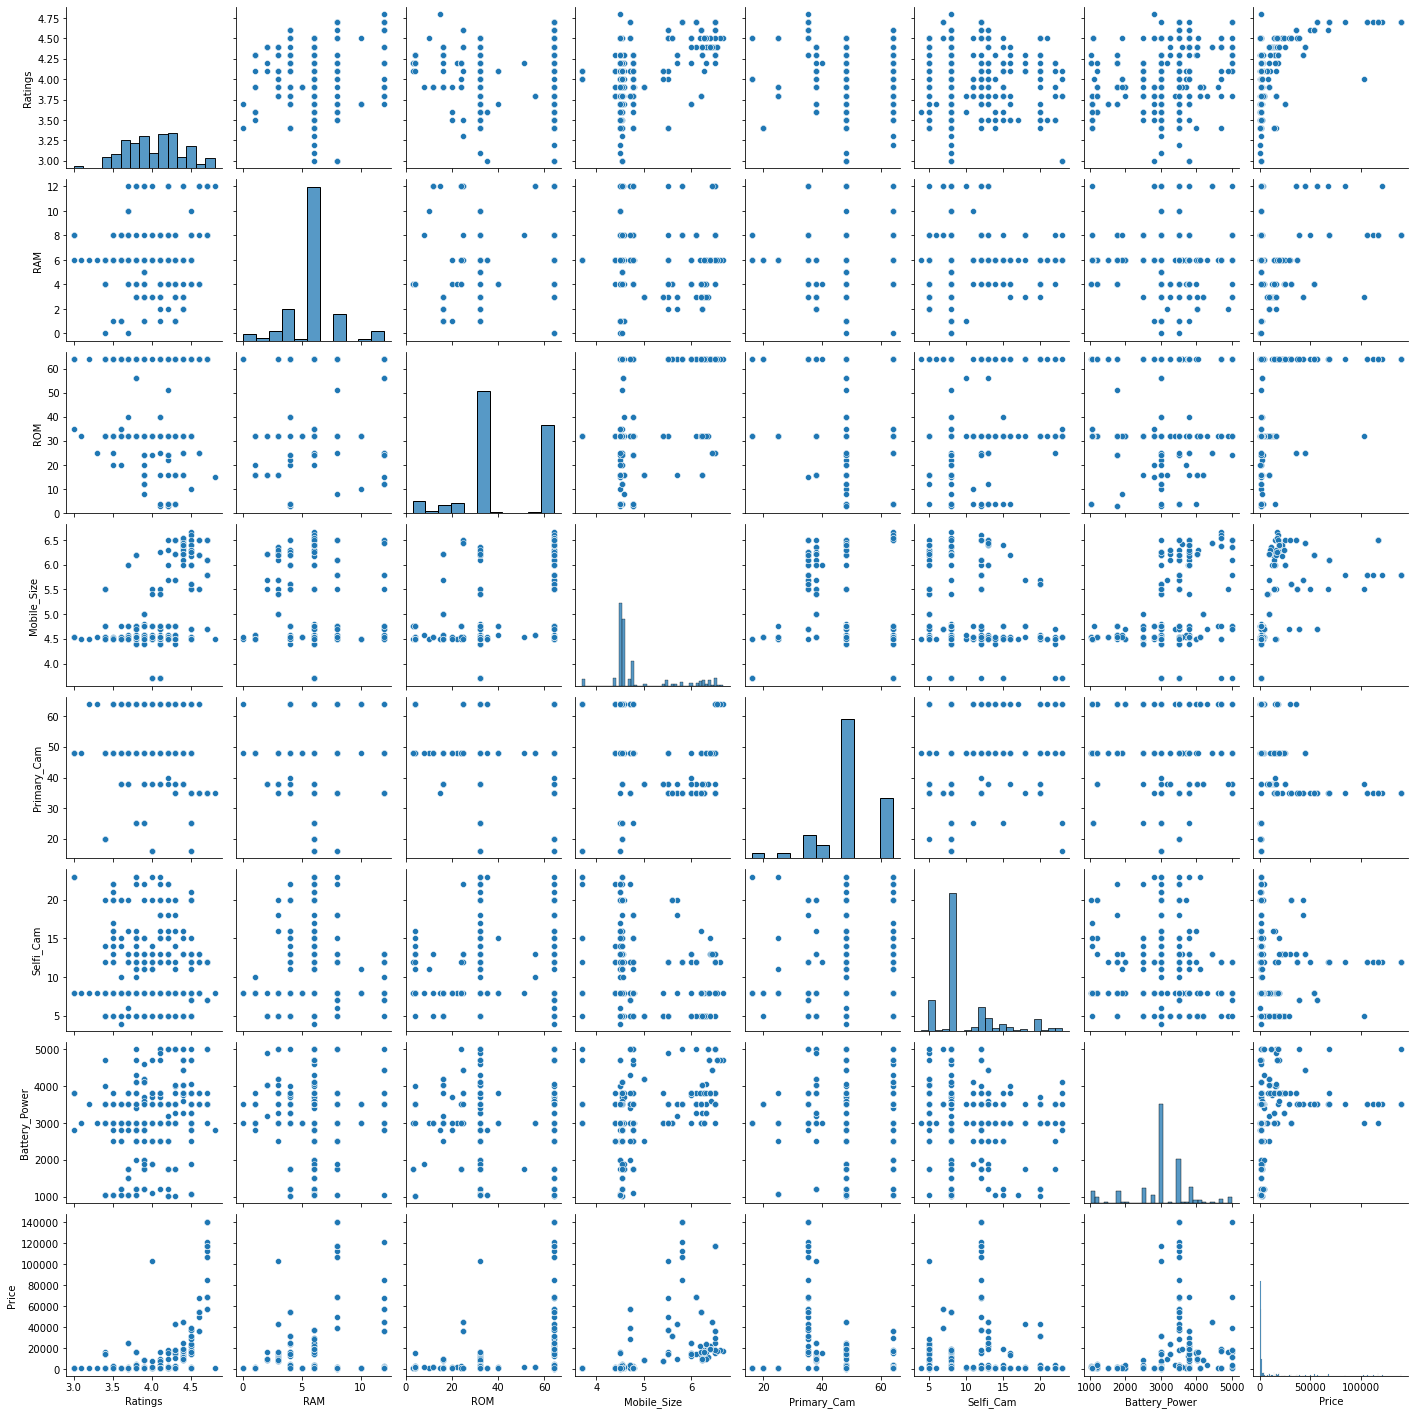

In [75]:
sns.pairplot(data = cleaned_df)
plt.show()

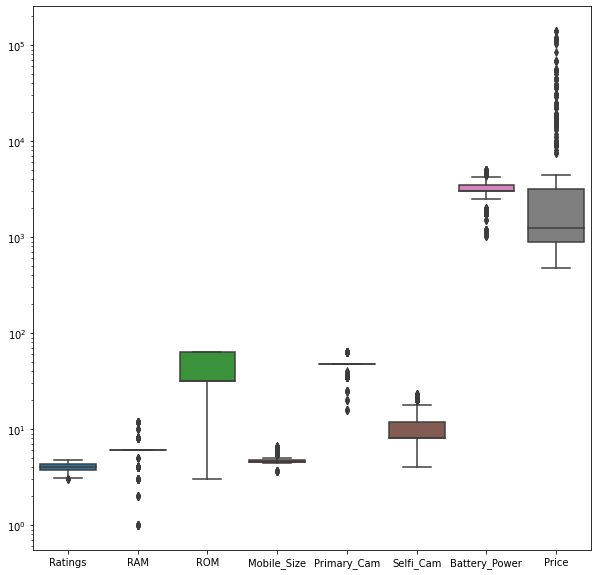

In [76]:
plt.figure(figsize = (10,10))
sns.boxplot(data = cleaned_df)
plt.yscale("log")

###  Engineering new features from the data we have
We will be creating a feature that represents the total battery capacity (in milliampere-hours (mAh)) per inch of screen size. We will name it 'battery_per_screen' for short.

In [77]:
cleaned_df['Battery_Per_Screen'] = cleaned_df['Battery_Power'] / cleaned_df['Mobile_Size']

In [78]:
cleaned_df.head()

,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price,Battery_Per_Screen
1,3.4,6.0,64.0,4.50,48,12.0,4000,15999,888.888889
2,4.3,4.0,4.0,4.50,64,16.0,4000,15000,888.888889
3,4.4,6.0,64.0,6.40,48,15.0,3800,18999,593.750000
10,3.9,6.0,32.0,4.54,64,8.0,4100,1099,903.083700
11,3.8,6.0,32.0,4.50,64,8.0,1050,1299,233.333333


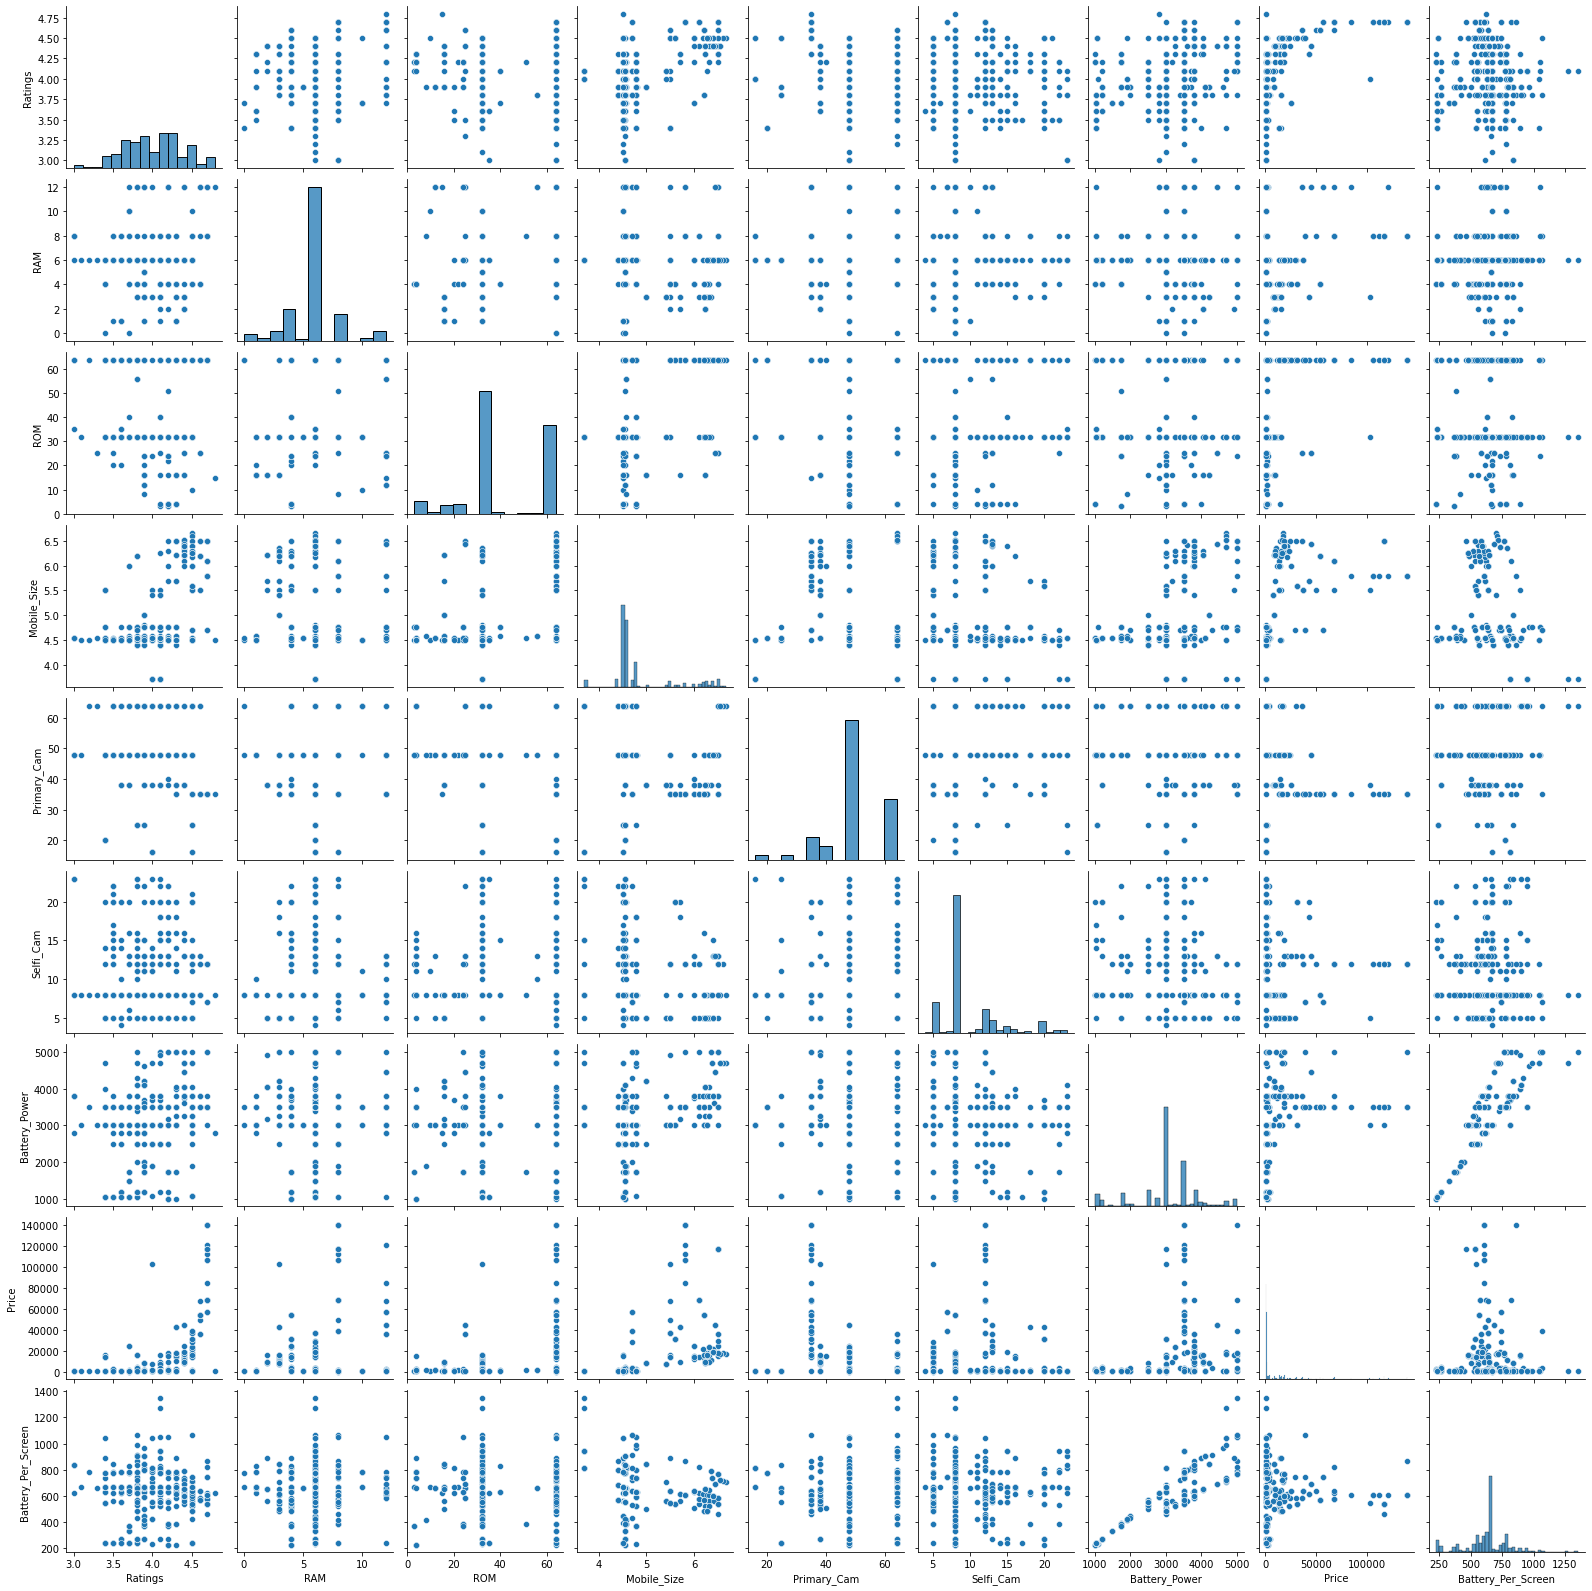

In [79]:
sns.pairplot(data = cleaned_df)
plt.show()

## Modelling
1. Splitting data into train and test set
2. Creating our Linear Regression model
3. Training our model
4. Evaluating model

### Train/Test split

In [80]:
x = cleaned_df[['Ratings','RAM', 'ROM', 'Mobile_Size','Primary_Cam', 'Selfi_Cam', 'Battery_Power', 'Battery_Per_Screen']]
y = cleaned_df['Price']

In [81]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

### Creating our Linear Regression model

In [82]:
linear_regression = LinearRegression()

### Training our model on our training data

In [83]:
linear_regression.fit(x_train, y_train)

LinearRegression()

### Evaluating our model

In [84]:
predictions = linear_regression.predict(x_test)

Text(0, 0.5, 'Predicted')

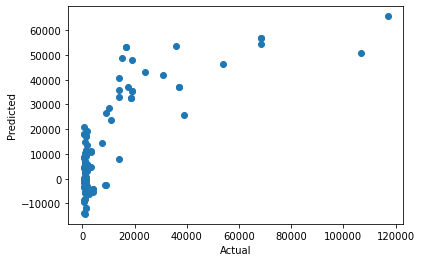

In [85]:
plt.scatter(y_test, predictions)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [87]:
print('MAE :'," ", metrics.mean_absolute_error(y_test,predictions))
print('MSE :'," ", metrics.mean_squared_error(y_test,predictions))
print('Coefficient of determination (R^2) :', " ", metrics.r2_score(y_test, predictions))

MAE :   9768.042001361968
MSE :   189332799.2919788
Coefficient of determination (R^2) :   0.5144212186371915
